## 구글 colab 사용시 드라이브 데이터 연동 및 colab에서 제공하는 hw에 대한 텐서플로우 버전 업데이트

In [1]:
## !pip install --upgrade tensorflow
# !pip install tensorflow


In [2]:
# import tensorflow as tf
# tf.__version__

In [3]:
# from google.colab import drive


In [4]:
# drive.mount('/content/gdrive')

In [5]:
# !ls /content/gdrive/My\ Drive/Colab\ Notebooks/

## 본격적인 코드 시작

In [6]:
# !pip install -U pandas-profiling 

In [7]:
import pandas as pd
import numpy as np
import pandas_profiling

In [8]:
# df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/bank.csv',encoding='utf-8')
df=pd.read_csv('bank.csv',encoding='utf-8')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [9]:
tmp_df_index=df.columns

for index in range(len(tmp_df_index)):
    columns_name=tmp_df_index[index]
    columns_ind=index+1
    print("{}. {}: {}".format(columns_ind,columns_name,len(df[columns_name].unique())))


1. age: 76
2. job: 12
3. marital: 3
4. education: 4
5. default: 2
6. balance: 3805
7. housing: 2
8. loan: 2
9. contact: 3
10. day: 31
11. month: 12
12. duration: 1428
13. campaign: 36
14. pdays: 472
15. previous: 34
16. poutcome: 4
17. deposit: 2


In [10]:
# df.isnull().sum()

In [11]:
# df.profile_report()

# 데이터 전처리

##### `job`,`marital`,`education`,`default`,`bousing`,`loan`,`contact`,`month`,`poutcome`,`deposit`

## 이진 분류 전처리
### `yes`=1, `no`=0

In [12]:
# 이진 분류 전처리

df['default']=df['default'].apply(lambda x:1 if x=='yes' else 0)
df['housing']=df['housing'].apply(lambda x:1 if x=='yes' else 0)
df['loan']=df['loan'].apply(lambda x:1 if x=='yes' else 0)
df['deposit']=df['deposit'].apply(lambda x:1 if x=='yes' else 0)

df.head(3)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1


## 3, 4 분류 전처리


In [13]:
#3,4진 분류 전처리

df['marital']=df['marital'].apply(lambda x:0 if x=='married' else 
                                  (1 if x=='single'  else 2))
df['contact']=df['contact'].apply(lambda x:0 if x=='telephone' else 
                                  (1 if x=='cellular'  else 2))
df['poutcome']=df['poutcome'].apply(lambda x:0 if x=='unknown' else 
                                   (1 if x=='other'  else 
                                    (2 if x=='failure'  else 3)))
df['education']=df['education'].apply(lambda x:0 if x=='secondary' else 
                                   (1 if x=='tertiary'  else 
                                    (2 if x=='primary'  else 3)))

df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,0,0,0,2343,1,0,2,5,may,1042,1,-1,0,0,1
1,56,admin.,0,0,0,45,0,0,2,5,may,1467,1,-1,0,0,1
2,41,technician,0,0,0,1270,1,0,2,5,may,1389,1,-1,0,0,1


## 기타 항목 전처리


### 출력값
1. 열에 중복되지 않는 값 반환 (`df['열 이름'].unique()`)
2. 열에 맵핑(덮어쓰기)할 딕셔너리 출력 (for  문: 딕셔너리 제작)


In [14]:
label_job=df['job'].unique()
print(label_job)
job_mapping={}
for index in range(len(label_job)):
    job_mapping[label_job[index]]=index
print(job_mapping)
df['job']=df['job'].map(job_mapping)
df.head(3)

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
{'admin.': 0, 'technician': 1, 'services': 2, 'management': 3, 'retired': 4, 'blue-collar': 5, 'unemployed': 6, 'entrepreneur': 7, 'housemaid': 8, 'unknown': 9, 'self-employed': 10, 'student': 11}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,1,0,2,5,may,1042,1,-1,0,0,1
1,56,0,0,0,0,45,0,0,2,5,may,1467,1,-1,0,0,1
2,41,1,0,0,0,1270,1,0,2,5,may,1389,1,-1,0,0,1


In [15]:
label_month=df['month'].unique()
print(label_month)
month_mapping={}
for index in range(len(label_month)):
    month_mapping[label_month[index]]=index+1
print(month_mapping)
df['month']=df['month'].map(month_mapping)
df.head(3)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
{'may': 1, 'jun': 2, 'jul': 3, 'aug': 4, 'oct': 5, 'nov': 6, 'dec': 7, 'jan': 8, 'feb': 9, 'mar': 10, 'apr': 11, 'sep': 12}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,1,0,2,5,1,1042,1,-1,0,0,1
1,56,0,0,0,0,45,0,0,2,5,1,1467,1,-1,0,0,1
2,41,1,0,0,0,1270,1,0,2,5,1,1389,1,-1,0,0,1


## 전처리 칼럼 수를 위해서 상관도 분석
### 정규화 전 columns 수 재구성

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

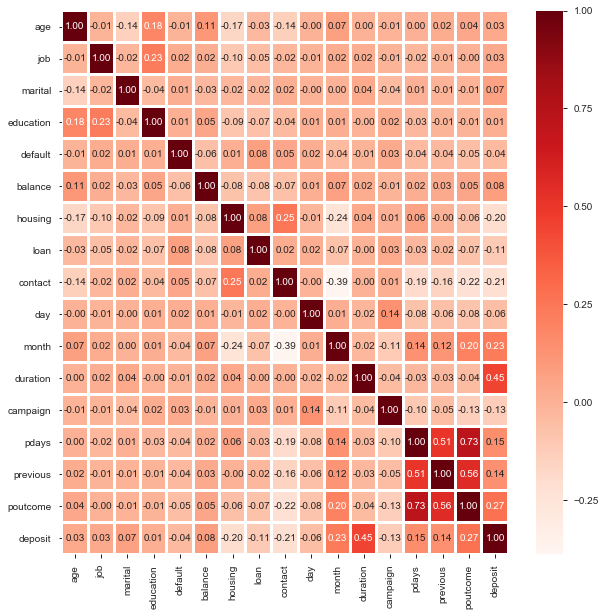

In [17]:
pearson_corr_data=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(pearson_corr_data,annot=True,cmap='Reds', lw=2,fmt='.2f')

### 상관도 절대값 취한 히트맵

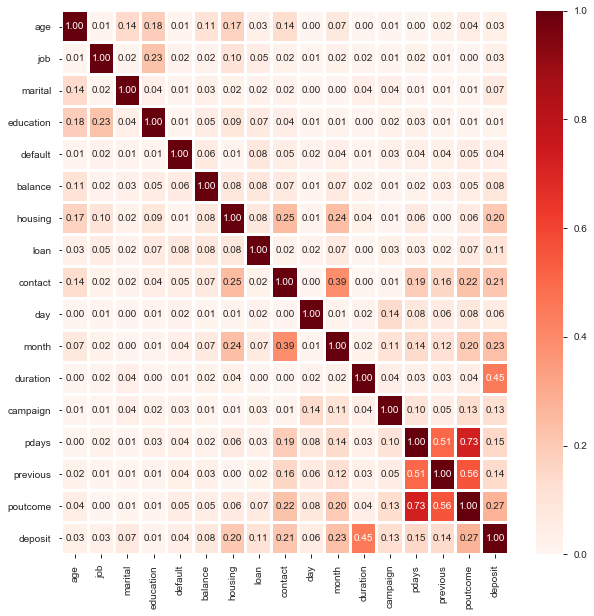

In [18]:
abs_corr_data=abs(pearson_corr_data)
plt.figure(figsize=(10,10))
sns.heatmap(abs_corr_data,annot=True,cmap='Reds', lw=2,fmt='.2f')

In [19]:
import matplotlib.pyplot as plt

In [20]:
bar_tmp_data = abs_corr_data.sort_values(['deposit'], ascending=True)

In [21]:
bar_data=bar_tmp_data['deposit']
bar_x=bar_tmp_data.index

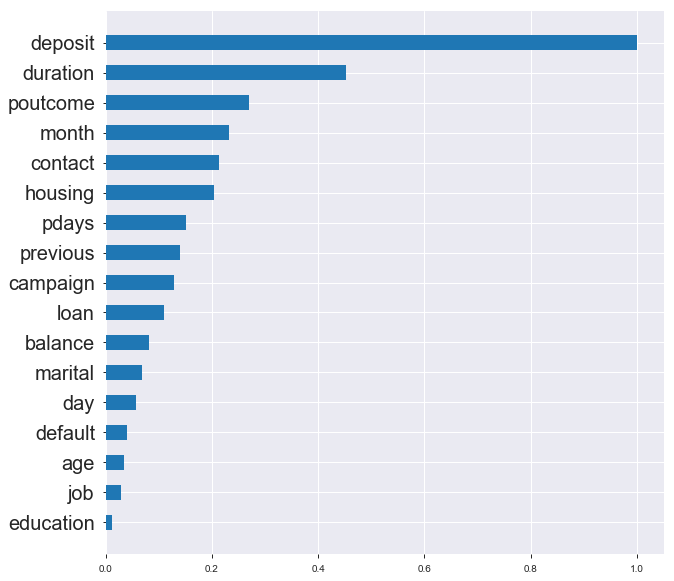

In [22]:
plt.figure(figsize=(10,10))
ypos=np.arange(len(bar_data))

rects = plt.barh(ypos, bar_data, align='center', height=0.5)
plt.yticks(ypos,bar_x,fontsize=20)
plt.show()


## deposit과 상관도 높은 열 순위

1. duration : 0.45

2. poutcome : 0.27

3. month : 0.23

4. contact : 0.21

5. housing : 0.20



In [23]:
#1. 모든 열 추출하여 사용
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,1,0,2,5,1,1042,1,-1,0,0,1
1,56,0,0,0,0,45,0,0,2,5,1,1467,1,-1,0,0,1
2,41,1,0,0,0,1270,1,0,2,5,1,1389,1,-1,0,0,1


In [24]:
# 2. deposit과 상관도 0.2 이상 되는 열(5개) 추출
tmp_df=df[['housing','contact','month','duration','poutcome','deposit']]
df=tmp_df

df.head(3)

,housing,contact,month,duration,poutcome,deposit
0,1,2,1,1042,0,1
1,0,2,1,1467,0,1
2,1,2,1,1389,0,1


In [25]:
#3. deposit과 상관도 높은 2열만 추출
# tmp_df=df[['duration','poutcome','deposit']]
# df=tmp_df

# df.head(3)

#### 데이터 모두 정규화

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler().fit(df)
standardized_X=scaler.transform(df)
df_tmp=pd.DataFrame(data=standardized_X,columns=df.columns)
df=df_tmp
df.head(3)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


,housing,contact,month,duration,poutcome,deposit
0,1.055280,1.685982,-1.023198,1.930226,-0.544516,1.053764
1,-0.947616,1.685982,-1.023198,3.154612,-0.544516,1.053764
2,1.055280,1.685982,-1.023198,2.929901,-0.544516,1.053764


## 케라스 사용해서 딥러닝 셋팅 후 시뮬레이션

In [28]:
from sklearn import model_selection

target = df[['deposit']].copy()
data = df.copy()
del data['deposit']

train_data, test_data, train_label, test_label = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(7813, 5)
(3349, 5)
(7813, 1)
(3349, 1)


### OneHot 인코딩

In [29]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

enc.fit(train_label)
train_label = enc.transform(train_label).toarray()

enc.fit(test_label)
test_label = enc.transform(test_label).toarray()

print(train_label.shape)
print(test_label.shape)

(7813, 2)
(3349, 2)


### 입력(x), 출력(y) 갯수 설정 및 반환

In [30]:
input_index=train_data.shape[1]
output_index=train_label.shape[1]
print(input_index, output_index)

5 2


## 딥러닝 러닝

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

# import os
# tf.logging.set_verbosity(tf.logging.ERROR)
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [32]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=input_index, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=output_index, activation='softmax')) # One-hot vector for 0 & 1

In [33]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [34]:
history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3,workers=0) 

Train on 5469 samples, validate on 2344 samples
Epoch 1/20
5469/5469 [==============================] - 1s 121us/sample - loss: 0.8832 - categorical_accuracy: 0.7508 - val_loss: 0.5376 - val_categorical_accuracy: 0.7649
Epoch 2/20
5469/5469 [==============================] - 0s 74us/sample - loss: 0.5663 - categorical_accuracy: 0.7703 - val_loss: 0.4564 - val_categorical_accuracy: 0.7927
Epoch 3/20
5469/5469 [==============================] - 0s 74us/sample - loss: 0.5136 - categorical_accuracy: 0.7705 - val_loss: 0.4396 - val_categorical_accuracy: 0.7965
Epoch 4/20
5469/5469 [==============================] - 0s 75us/sample - loss: 0.4935 - categorical_accuracy: 0.7866 - val_loss: 0.4284 - val_categorical_accuracy: 0.8089
Epoch 5/20
5469/5469 [==============================] - 0s 71us/sample - loss: 0.4514 - categorical_accuracy: 0.7983 - val_loss: 0.4335 - val_categorical_accuracy: 0.8067
Epoch 6/20
5469/5469 [==============================] - 0s 74us/sample - loss: 0.4466 - categori

In [35]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

3349/3349 [==============================] - 0s 28us/sample - loss: 0.4118 - categorical_accuracy: 0.8199
loss (cross-entropy) : 0.41177314064259957
test accuracy : 0.8199462


## 러닝 후 예측 결과(pred_y)에 대한 결과 및 시각화 분석

In [36]:
import numpy as np
import matplotlib.pyplot as plt

### 교차 검증/ 정확도 그래프 분석

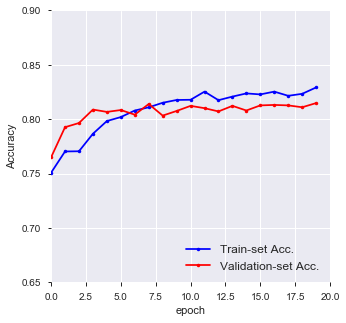

In [37]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']


x_len = np.arange(len(acc))
plt.figure(figsize=(5,5))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right',fontsize=12)
# plt.grid()
plt.ylim(0.65,0.9)
plt.xlim(0, 20)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

### roc 커브(auc)

In [38]:
from sklearn.metrics import auc,roc_curve

In [39]:
pred_y_proba=model.predict_proba(test_data)
fpr,tpf,_=roc_curve(y_true=test_label[:,1],y_score=pred_y_proba[:,1])
pred_auc=auc(fpr,tpf)

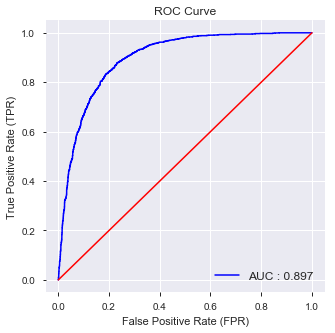

In [40]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpf,lw=1.5,c='blue',label='AUC : {:.3f}'.format(pred_auc))
plt.plot([0,1],[0,1],lw=1.5,c='Red')
# plt.ylim(0,4)
# plt.xlim(0,max(x_len))
plt.legend(loc='lower right',fontsize=12)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title("ROC Curve", fontsize=12)
plt.show()

### 분석모델에 필요한 분석 지표

In [41]:
from sklearn.metrics import classification_report

In [42]:
pred_y=model.predict_classes(test_data)
target_name=['Not Deposit','Deposit']
print('Test Data classification report')
class_report=classification_report(test_label[:,1],pred_y,target_names=target_name)
print(class_report)


Test Data classification report
              precision    recall  f1-score   support

 Not Deposit       0.85      0.80      0.83      1792
     Deposit       0.79      0.84      0.81      1557

   micro avg       0.82      0.82      0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

